In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.under_sampling import RandomUnderSampler
import joblib

In [ ]:
diamonds = pd.read_csv('diamonds_original.csv')

In [ ]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [ ]:
priceClasses = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
classColumn = []
d = diamonds['price']
for i in d:
  if i >= 0 and i <= 5000:
    classColumn.append(priceClasses[0])
  elif i <= 10000:
    classColumn.append(priceClasses[1])
  elif i <= 15000:
    classColumn.append(priceClasses[2])
  elif i > 15000:
    classColumn.append(priceClasses[3])

In [ ]:
s = pd.Series(classColumn)
diamonds.reset_index(inplace=True)
diamonds.drop('index', axis='columns', inplace=True)
diamonds['class'] = s
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,price,class
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0,"(5000, 10000]"
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0,"[0, 5000]"
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0,"[0, 5000]"
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0,"(5000, 10000]"
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0,"[0, 5000]"
...,...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0,"[0, 5000]"
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0,"[0, 5000]"
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0,"[0, 5000]"
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0,"[0, 5000]"


In [ ]:
feature_names = ['carat', 'price']

In [ ]:
X = diamonds[feature_names]
X

,carat,price
0,1.26,6546.0
1,0.80,3030.0
2,0.56,1915.0
3,1.51,6936.0
4,0.33,646.0
...,...,...
53935,1.02,4796.0
53936,0.93,3750.0
53937,0.30,491.0
53938,0.36,807.0


In [ ]:
y = diamonds['class']
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
53935        [0, 5000]
53936        [0, 5000]
53937        [0, 5000]
53938        [0, 5000]
53939        [0, 5000]
Name: class, Length: 53940, dtype: object

In [ ]:
undersampler = RandomUnderSampler(random_state = 42)

In [ ]:
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [ ]:
X_undersampled

,carat,price
0,1.54,11795.0
1,2.45,11830.0
2,1.14,10878.0
3,1.30,12932.0
4,1.52,11206.0
...,...,...
6615,0.91,3936.0
6616,0.70,1966.0
6617,0.30,665.0
6618,0.43,792.0


In [ ]:
X = X_undersampled
X

,carat,price
0,1.54,11795.0
1,2.45,11830.0
2,1.14,10878.0
3,1.30,12932.0
4,1.52,11206.0
...,...,...
6615,0.91,3936.0
6616,0.70,1966.0
6617,0.30,665.0
6618,0.43,792.0


In [ ]:
y_undersampled.value_counts()

(10000, 15000]    1655
(5000, 10000]     1655
15000+            1655
[0, 5000]         1655
Name: class, dtype: int64

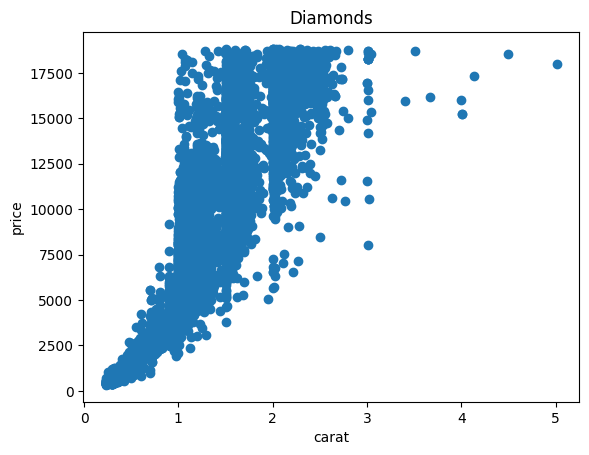

In [ ]:
plt.scatter(X['carat'], X['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.title("Diamonds")
plt.show()

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = pd.DataFrame(scaler.fit_transform(X), columns = feature_names)
X

,carat,price
0,0.274059,0.620046
1,0.464435,0.621939
2,0.190377,0.570471
3,0.223849,0.681516
4,0.269874,0.588203
...,...,...
6615,0.142259,0.195167
6616,0.098326,0.088663
6617,0.014644,0.018327
6618,0.041841,0.025193


***

Pomocne funkcije za izvestaj o modelu

In [ ]:
def plot_search(X):
  eps_values = list(np.arange(0.01, 0.06, 0.01))
  min_samples = [4, 5, 7, 10]
  fig = plt.figure(figsize=(12, 40))
  silhouette = []
  idx = 1
  for eps in eps_values:
    for min_sample in min_samples:
      model = DBSCAN(eps=eps, min_samples=min_sample)
      model.fit(X)
      silhouette.append(silhouette_score(X, model.labels_))

      fig.add_subplot(len(eps_values), len(min_samples), idx)
      idx += 1

      k = max(model.labels_) + 1
      for cluster_label in range(-1, k):
        cluster = X_undersampled[model.labels_ == cluster_label]
        if cluster_label == -1:
          plt.scatter(cluster['carat'], cluster['price'], label=f'noise', c='Black')
        plt.scatter(cluster['carat'], cluster['price'], label=f'cluster {cluster_label}')
      plt.title(f'eps={eps}, msamp={min_sample} s={silhouette_score(X, model.labels_):.4f}')

  plt.tight_layout()

  return silhouette

## DBScan

In [ ]:
dbs = DBSCAN(eps=0.05, min_samples=2)

In [ ]:
dbs.fit(X)

DBSCAN(eps=0.05, min_samples=2)

In [ ]:
clustered_data = X.copy()
clustered_data['cluster'] = dbs.labels_
clustered_data

,carat,price,cluster
0,0.274059,0.620046,0
1,0.464435,0.621939,0
2,0.190377,0.570471,0
3,0.223849,0.681516,0
4,0.269874,0.588203,0
...,...,...,...
6615,0.142259,0.195167,0
6616,0.098326,0.088663,0
6617,0.014644,0.018327,0
6618,0.041841,0.025193,0


In [ ]:
clustered_data['cluster'].value_counts()

 0    6604
-1      11
 2       3
 1       2
Name: cluster, dtype: int64

In [ ]:
silhouette_values = silhouette_samples(X, dbs.labels_)
silhouette_values

array([-0.18420675, -0.76962103,  0.05679175, ...,  0.28253074,
        0.28014168,  0.28406614])

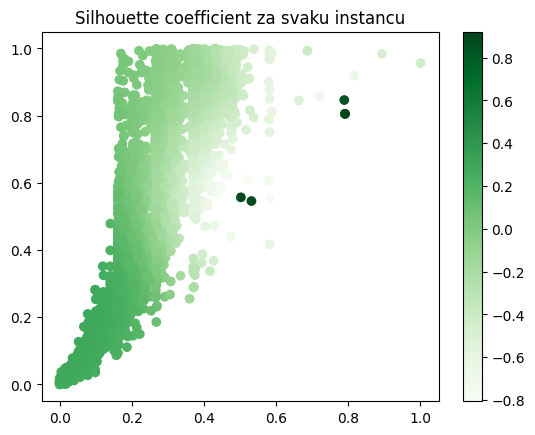

In [ ]:
plt.scatter(X['carat'], X['price'], c = silhouette_values, cmap="Greens")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu")
plt.show()

***

Parameter search

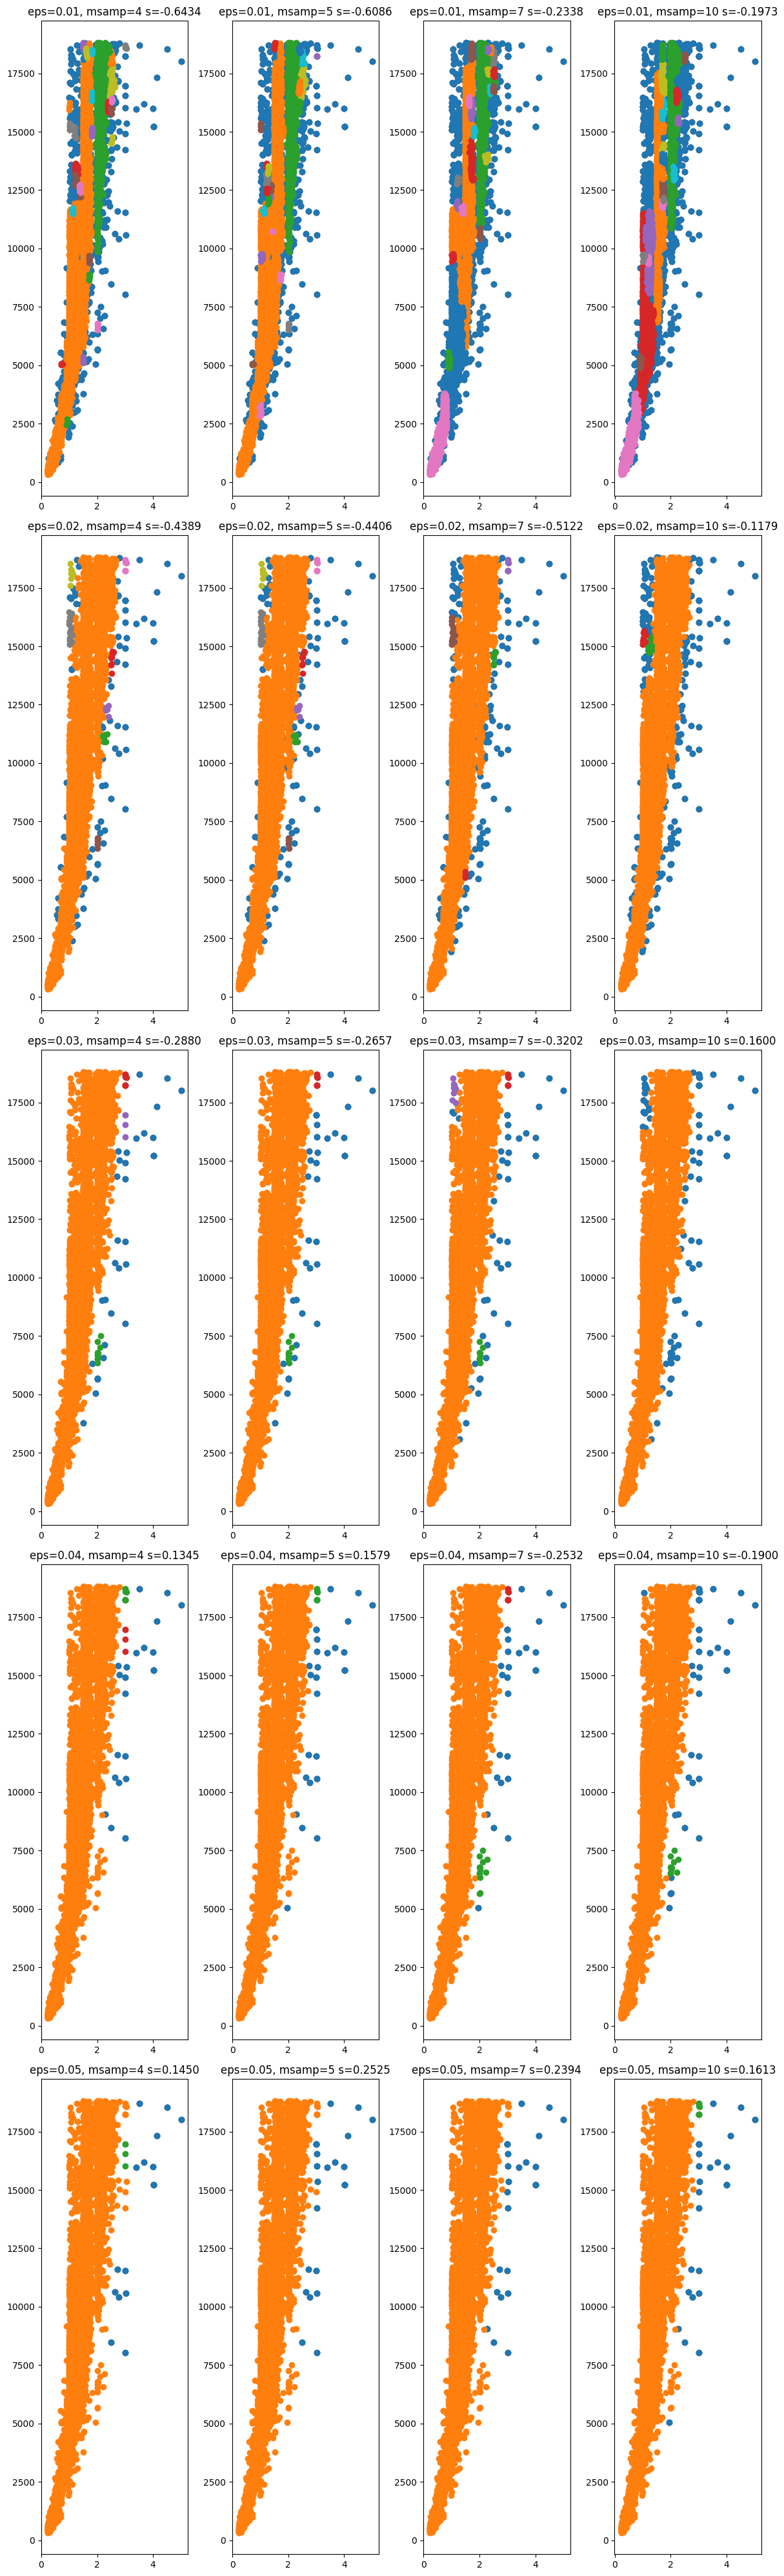

In [ ]:
silhouette = plot_search(X)

Rezultati nisu zadovoljavajuci.
Za vece **eps** dobijamo jedan klaster i sve ostalo gleda kao sumove, vecina modela ima i negativan **silhouette_score**
Za manje **eps** dobijamo previse klastera  
 
Izabracemo model sa eps=0.05 i min_samples=5

In [ ]:
model = DBSCAN(eps=0.05, min_samples=5)

In [ ]:
model.fit(X)

DBSCAN(eps=0.05)

In [ ]:
silhouette_values = silhouette_samples(X, model.labels_)
silhouette_values

array([ 0.29431208, -0.24981433,  0.41419857, ...,  0.46862153,
        0.47177138,  0.47312197])

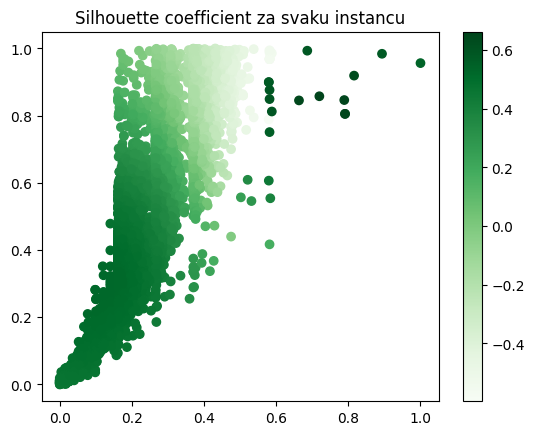

In [ ]:
plt.scatter(X['carat'], X['price'], c = silhouette_values, cmap="Greens")
plt.colorbar()
plt.title("Silhouette coefficient za svaku instancu")
plt.show()

In [ ]:
joblib.dump(model, 'DBS.pkl')

['DBS.pkl']